## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [ ]:
!pip install pyspark==3.4.0

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2024-08-14 13:35:01--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [   <=>              ]   1.79G  2.37MB/s    in 11m 51s 

2024-08-14 13:46:52 (2.58 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1920482240]

total 1875480
-rw-r--r-- 1 root root 1920482240 Aug 14 11:10 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Aug 12 13:24  sample_data


In [ ]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1875480
-rw-r--r-- 1 root root 1920482240 Aug 14 11:10 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Aug 12 13:24 sample_data


In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## Schemas

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [ ]:
labels = [
    ('ID', StringType()),
    ('Case Number', StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR', StringType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description', StringType()),
    ('Arrest', StringType()),
    ('Domestic', BooleanType()),
    ('Beat', StringType()),
    ('District', StringType()),
    ('Ward', StringType()),
    ('Community Area', StringType()),
    ('FBI Code', StringType()),
    ('X Coordinate', StringType()),
    ('Y Coordinate', StringType()),
    ('Year', IntegerType()),
    ('Updated On', StringType()),
    ('Latitude', DoubleType()),
    ('Longitude', DoubleType()),
    ('Location', StringType())]

In [ ]:
schema = StructType([StructField(x[0], x[1], True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [ ]:
rc_dataframe = spark.read.csv('reported-crimes.csv', schema=schema)
rc_dataframe.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc_dataframe.show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|  

## Working with columns

**Display only the first 5 rows of the column name IUCR**

In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [ ]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HN549294|2007-08-25 09:22:18| false|
|   HH109118|2002-01-05 21:24:00|  true|
|   JE293464|2011-08-10 00:01:00| false|
|   JE439378|2015-09-24 00:00:00| false|
+-----------+-------------------+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|  

**Remove the column One**

In [ ]:
rc = rc.drop('One')
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [ ]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

4

In [ ]:
rc.union(one_day).orderBy('Date', ascending = False).show(5)

+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|    008XX E 63RD ST|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT|

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [ ]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  46958|
|CRIMINAL SEXUAL A...|   1512|
|            STALKING|   3389|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    586|
|               ARSON|  11157|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193373|
|             ASSAULT| 418523|
|LIQUOR LAW VIOLATION|  14068|
| MOTOR VEHICLE THEFT| 314135|
|               THEFT|1418536|
|             BATTERY|1232296|
|             ROBBERY| 255603|
|            HOMICIDE|   9476|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
| CRIM SEXUAL ASSAULT|  26314|
|   HUMAN TRAFFICKING|     49|
+--------------------+-------+
only showing top 20 rows



In [ ]:
rc.groupBy('Primary Type').count().orderBy('count', ascending = False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418536|
|            BATTERY|1232296|
|    CRIMINAL DAMAGE| 771524|
|          NARCOTICS| 711780|
|      OTHER OFFENSE| 419048|
|            ASSAULT| 418523|
|           BURGLARY| 388040|
|MOTOR VEHICLE THEFT| 314135|
| DECEPTIVE PRACTICE| 267425|
|            ROBBERY| 255603|
+-------------------+-------+
only showing top 10 rows



## Challenge 1

**What percentage of reported crimes resulted in an arrest?**

In [ ]:
number_of_arrest = rc.filter(rc.Arrest == True).count()
total_crimes = rc.select('Arrest').count()
percentage = (number_of_arrest/total_crimes)*100
percentage

27.75378861537396

  **What are the top 3 locations for reported crimes?**

In [ ]:
location = rc.groupBy('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770643|
|           RESIDENCE|1146476|
|           APARTMENT| 699351|
+--------------------+-------+
only showing top 3 rows



## Built-in functions

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|             assault|             ASSAULT|                         ASSA|
|               theft|               THEFT|                         THEF|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [ ]:
from pyspark.sql.functions import max, min

In [ ]:
rc.select(max(col('Date')), min(col('Date'))).show()

+-------------------+-------------------+
|          max(Date)|          min(Date)|
+-------------------+-------------------+
|2018-11-11 00:00:00|2001-01-01 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [ ]:
from pyspark.sql.functions import date_add, date_sub

In [ ]:
help(date_add)

In [ ]:
help(date_sub)

In [ ]:
rc.select(date_add(max(col('Date')), 3), date_sub(min(col('Date')), 3)).show(1)

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2018-11-14|            2000-12-29|
+----------------------+----------------------+



## Working with dates

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



## Joins

**Download police station data**

In [ ]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2024-08-14 17:14:12--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2024-08-14 17:14:15 (693 MB/s) - ‘police-station.csv’ saved [5699]

total 1875488
-rw-r--r-- 1 root root       5699 Aug 19  2019 police-station.csv
-rw-r--r-- 1 root root 1920482240 Aug 14 11:10 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Aug 12 13:24 sample_data


In [ ]:
ps = spark.read.csv('police-station.csv', header = True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [ ]:
rc.cache()
rc.count()

6757218

In [ ]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|    null|
+--------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

In [ ]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [ ]:
ps = ps.withColumn('Format_District', lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_Dist

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District']

In [ ]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_District|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|2007|08/17/2015 03:03:...|      24|  Roger

## Challenge 2

**What is the most frequently reported non-criminal activity?**

In [ ]:
rc.show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OT

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(rc.select(col('Primary Type')).distinct().count(), truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
non_criminal = rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)') )
non_criminal.show(50)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 8773145|   HV447848|2012-08-25 15:00:00|    100XX W OHARE ST|5093|        NON-CRIMINAL|       LOST PASSPORT|AIRPORT TERMINAL 

In [ ]:
non_criminal.groupBy('Description').count().orderBy('count', ascending = False).show(truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [ ]:
non_criminal.groupBy('Description').count().orderBy('count', ascending = False).show(1)

+-------------+-----+
|  Description|count|
+-------------+-----+
|LOST PASSPORT|  107|
+-------------+-----+
only showing top 1 row



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [ ]:
from pyspark.sql.functions import dayofweek

In [ ]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2007-08-25 09:22:18|              7|
|2002-01-05 21:24:00|              7|
|2011-08-10 00:01:00|              4|
|2015-09-24 00:00:00|              5|
|2014-09-07 00:00:00|              1|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending = False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017531|
|                 Wed| 974441|
|                 Tue| 968600|
|                 Sat| 965646|
|                 Thu| 965181|
|                 Mon| 953316|
|                 Sun| 912503|
+--------------------+-------+





---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912503),
 Row(date_format(Date, E)='Mon', count=953316),
 Row(date_format(Date, E)='Thu', count=965181),
 Row(date_format(Date, E)='Sat', count=965646),
 Row(date_format(Date, E)='Wed', count=974441),
 Row(date_format(Date, E)='Fri', count=1017531),
 Row(date_format(Date, E)='Tue', count=968600)]

In [ ]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [ ]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[912503, 953316, 965181, 965646, 974441, 1017531, 968600]

In [ ]:
graph = pd.DataFrame({'Day_of_Week' : dow, 'Count' : cnt})
graph.head(7)

,Day_of_Week,Count
0,Sun,912503
1,Mon,953316
2,Thu,965181
3,Sat,965646
4,Wed,974441
5,Fri,1017531
6,Tue,968600


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

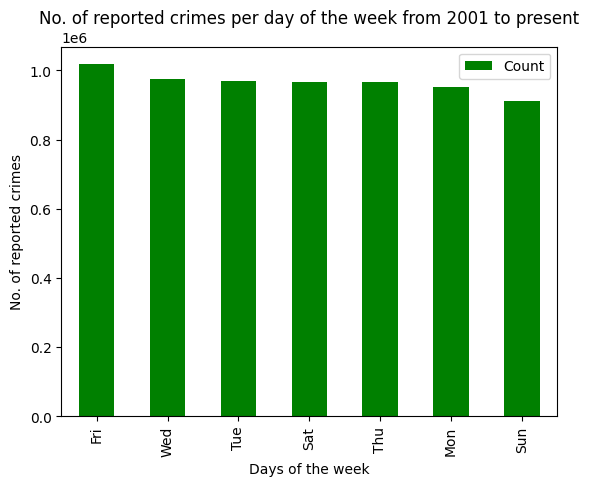

In [ ]:
graph.sort_values('Count', ascending = False).plot(kind = 'bar', x = 'Day_of_Week', y = 'Count', color = 'green')
plt.xlabel('Days of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')